<a href="https://colab.research.google.com/github/GaiaSaveri/intro-to-ml/blob/main/notebooks/Lab-5.UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning on the Dry Bean Dataset

In this lab we will try to obtain valuable information using Unsupervised Learning techniques.

The original data has been downloaded from https://archive-beta.ics.uci.edu/dataset/602/dry+bean+dataset (Dry Bean Dataset. (2020). UCI Machine Learning Repository)

**Data Set Description**:

Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera.
A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

## Loading and Pre-treatment of the Data

In [1]:
# Load libraries and modules
import pandas as pd
from sklearn import preprocessing
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression
from sklearn.metrics.cluster import normalized_mutual_info_score
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
FFILE = './Dry_Bean_Dataset.xlsx'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/Lab5/Dry_Bean_Dataset.xlsx"
else:
    print("Either the file is missing or not readable, download it")
    !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/Lab5/Dry_Bean_Dataset.xlsx"

Either the file is missing or not readable, download it
--2023-10-25 14:34:04--  https://raw.github.com/alexdepremia/ML_IADA_UTs/main/Lab5/Dry_Bean_Dataset.xlsx
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/alexdepremia/ML_IADA_UTs/main/Lab5/Dry_Bean_Dataset.xlsx [following]
--2023-10-25 14:34:04--  https://raw.githubusercontent.com/alexdepremia/ML_IADA_UTs/main/Lab5/Dry_Bean_Dataset.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3043341 (2.9M) [application/octet-stream]
Saving to: ‘Dry_Bean_Dataset.xlsx’

Dry_Bean_

In [3]:
# Load the data
data = pd.read_excel('./Dry_Bean_Dataset.xlsx')
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [4]:
# Transform the data to use it as numpy arrays.
X = data.iloc[:,:-1].values # Extract the features (all columns except the last one) as a NumPy array
label = data.iloc[:,16].values # Extract the labels from the last column as a NumPy array
print(X.shape)
N = X.shape[0]  # Number of data points
nc = X.shape[1]  # Number of features/components
print(np.unique(label))

(13611, 16)
['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


In [5]:
# Ordinal encoder for the ground truth labels
enc = preprocessing.OrdinalEncoder() # Create an OrdinalEncoder object for encoding labels
enc.fit(label.reshape(-1, 1)) # Fit the encoder to the label data
y = enc.transform(label.reshape(-1, 1))  # Encode the labels and store them in 'y'
print(y)  # Encoded labels

[[5.]
 [5.]
 [5.]
 ...
 [3.]
 [3.]
 [3.]]


In [7]:
# Rescale the features of the data since the units are different: subtract the average and divide by the standard deviation

scaler = preprocessing.StandardScaler().fit(X)  # Create a StandardScaler and fit it to the feature data
X_scaled = scaler.transform(X)  # Scale (normalize) the features using the computed mean and standard deviation
X_scaled

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  2.40217287,
         1.92572347,  0.83837103],
       [-0.82918764, -1.01392388, -1.39591111, ...,  3.10089314,
         2.68970162,  0.77113842],
       [-0.80715717, -1.07882906, -1.25235661, ...,  2.23509147,
         1.84135576,  0.91675514],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.28920441,
         0.33632829,  0.39025114],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.22837538,
         0.2489734 ,  0.03644001],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.12777587,
        -0.2764814 ,  0.71371948]])

## Principal Component Analysis (PCA)

**Objective**: find the set of orthogonal directions along which the variance of the data is the highest.

Summary of the method:

* Center the data feature matrix $X$;

* Compute the covariance matrix $C$ of the data as $C=X^T X$;

* Compute eigenvalues and eigenvectors of the covariance matrix $C$. In this step, you find the eigenvalues and eigenvectors of the covariance matrix. Eigenvalues represent how much variance is explained by the corresponding eigenvector. They are calculated using the `eigh` function from the `scipy.LA` (linear algebra) module. These eigenvalues and eigenvectors will be sorted in descending order according to the eigenvalues, and then arranged as columns of a matrix A.

**Recall**: Eigenvalues are measures of variance in the data along the direction of the corresponding eigenvector. High eigenvalues indicate that the data varies significantly along the corresponding direction..

* Compute principal components as $X\cdot A$. The principal components are new feature vectors that capture the most important information in the data. They are calculated by multiplying the original data matrix X by the matrix A containing the sorted eigenvectors. This step effectively transforms the data into a new set of uncorrelated features (the principal components) in such a way that the first principal component explains the most variance, the second component explains the second most variance, and so on.

### Model Assessment: choose the number of PCs to keep


**Objective**: The main goal here is to determine the final dimension, denoted as 'd,' of the transformed data. In the context of Principal Component Analysis (PCA), this means deciding how many principal components to retain.

1. **Proportion of variance explained**: This is a common method for choosing the number of principal components to keep. It involves the following steps:

   - **Eigenvalues $\lambda_i$ of the covariance matrix**: These are the eigenvalues obtained during the PCA process, representing the variance of the data along each principal component.
   
   - **Threshold $t\in [0, 1]$**: You set a threshold value 't' between 0 and 1. This threshold represents the proportion of the total variance you want to retain in the transformed data.

   - **Choose 'd'**: You choose the number of principal components 'd' such that the ratio $\chi_d = \frac{\sum_{i=1}^d \lambda_i}{\sum_{i=1}^D \lambda_i} > t$. In simpler terms, you sum the eigenvalues from the first principal component to the 'd'-th principal component and divide this sum by the total sum of all eigenvalues. You keep increasing 'd' until this ratio exceeds the specified threshold 't'. This method ensures that you keep enough principal components to retain a significant proportion of the variance in the data.

2. **Check the existence of a gap in the spectrum of the covariance matrix**: This is another technique to decide the number of principal components to retain. It involves examining the eigenvalues of the covariance matrix. If there is a clear "gap" or drop in the magnitude of eigenvalues, it suggests that there is a natural point in the data where most of the information is contained. You might choose the number of principal components based on this gap in the spectrum.

In [8]:
# Perform PCA with sklearn
pca = PCA()
pca.fit(X_scaled)
projection = pca.transform(X_scaled) # Transform the data into the new PCA space
cumul = np.zeros(nc)

for i in range(nc):
   cumul[i] = np.sum(pca.explained_variance_ratio_[:i+1])

lambs = pca.explained_variance_ # Obtain the eigenvalues
comp = np.arange(nc) + 1 # Create an array representing the components (eigenvalues)

1. The  `for` loop calculates the cumulative explained variance for each principal component. Essentially, for each principal component, it sums the explained variance from all preceding principal components. This provides an idea of how much of the total data variance is captured by each principal component.

2. `lambs = pca.explained_variance_`: Here, eigenvalues are obtained from the PCA model. Eigenvalues represent the explained variance by each principal component.

3. `comp = np.arange(nc) + 1`: This line creates an array of numbers from 1 to `nc` (the number of principal components) to represent the components themselves.

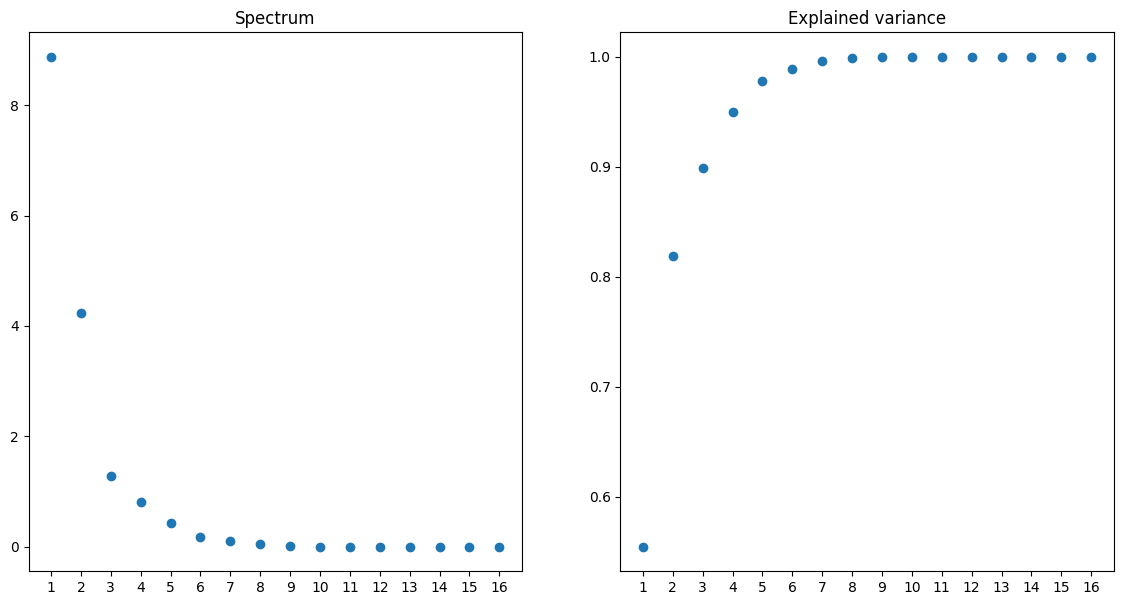

In [9]:
f, [ax1 ,ax2] = plt.subplots(1, 2,figsize = (14, 7))
ax1.set_title('Spectrum')
ax1.scatter(comp, lambs)
ax1.set_xticks(comp)
ax2.set_title('Explained variance')
ax2.scatter(comp, cumul)
ax2.set_xticks(comp)
plt.show()

The connection between these two is that the "Explained variance" plot provides insight into how much of the total data variance is accounted for by including different combinations of principal components, and this information is derived from the "Spectrum," where each eigenvalue quantifies the variance explained by an individual principal component.

In [10]:
# Number of components depending on the explained variance threshold.
for t in [0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 0.999]:
    nc = np.argmax(cumul - t > 0.) + 1
    print(t, nc)

0.8 2
0.85 3
0.9 4
0.95 4
0.97 5
0.99 7
0.999 8


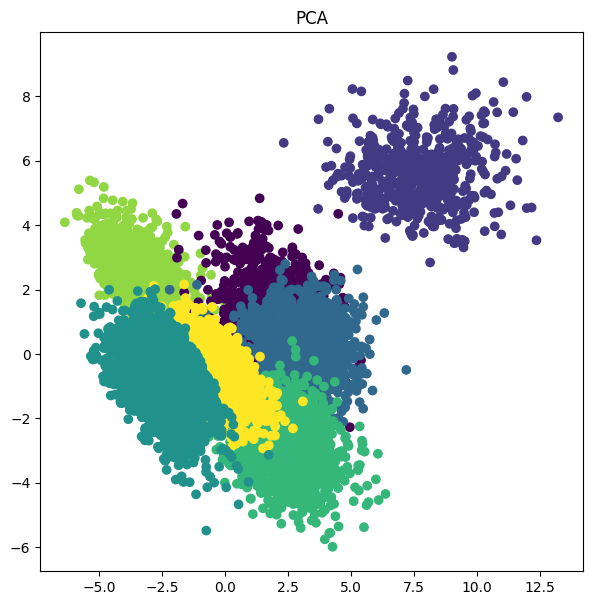

In [11]:
# plotting the data set in 2D (i.e. keep only 2 PCs) colored by its ground truth label
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(projection[:,0],projection[:,1], c=y)
ax.set_title('PCA')
plt.show()

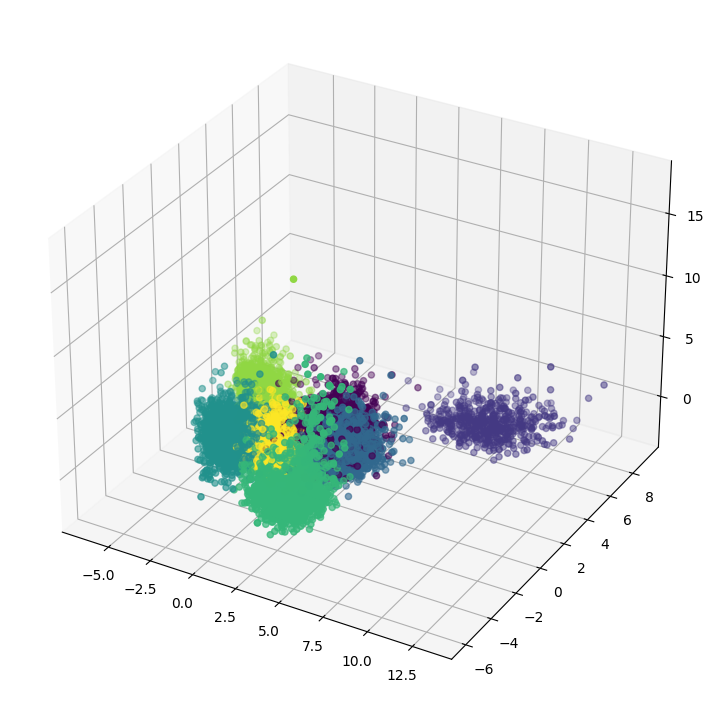

In [12]:
# Now in 3D (i.e. keep only 3 PCs)
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(projection[:,0],projection[:,1], projection[:,2],c=y)
plt.show()

1. What would happen if we don't rescale the features?

2. Which is the Intrinsic Dimension (ID) of the data set?

  **Recall**: the ID of a dataset is the minimum number of dimensions we need to describe the data in a accurate way.

3. Could you compute the two-NN estimate of the ID?

  The procedure works as follows:

  1. Compute pairwise distances among points;
  2. For each point $i$, extract the distance from its two closest neighbors $r_{i1}, r_{i2}$ respectively;
  3. Compute the ratio $\mu_i = \frac{r_{i2}}{r_i1}$;
  4. Compute the empirical cumulative distribution $\mathcal{F}(\mu)$ of $\mu$;
  5. Find the best fitting line for the dataset $\{\log \mu_i, \log (1 - \mathcal{F}(\mu_i)\}_{i=1}^N$
  6. The intrinsic dimension is given by the slope of this fitted line.

## K-means

Flat clustering algorithm whose goal is to minimize the intracluster distance while maximizing the intercluster distance.

We will compute the k-means clustering using two types of initialization:

**1. Random Initialization:**
In the context of k-means clustering, this method involves initializing the cluster centroids by randomly selecting data points from the dataset. The cluster centroids are the central points of the clusters. Using random initialization, these centroids are set to some random data points. The randomness in selection may lead to different results each time the algorithm is run, and the final cluster assignment may vary.

**2. k-means++ Initialization:**
The k-means++ initialization is a more sophisticated method. It starts by selecting the first cluster center (centroid) at random from the dataset. After that, it chooses new cluster centers in such a way that they are distant from the existing centers. The idea is to ensure a better initial configuration that can lead to more stable and consistent clustering results. k-means++ tends to perform better than random initialization and can converge to a better clustering solution. It helps avoid some of the problems associated with random initialization, such as converging to suboptimal or imbalanced cluster assignments.

In [14]:
def k_means_internal(k, X, init):
    '''
    Parameters
    ----------
    k : int
      Number of clusters
    X : matrix of dimension N x D
      Dataset
    init : str either '++' or 'random'
      Type of initialization for k-means algorithm
    '''
    N = X.shape[0]  # Number of data points
    nc = X.shape[1]  # Number of features (dimensions)
    ll = np.arange(k)  # Create an array to iterate over clusters
    z = np.zeros(N, dtype='int')  # Cluster number assigned to each data point
    cent = np.zeros([k, nc])  # Coordinates of the cluster centers

    # k-means++
    if (init=='++'):
        b = np.random.choice(N, 1, replace=False)  # Choose the first cluster center at random
        cent[0, :] = X[b, :]
        nchosen = 1  # Number of cluster centers already set
        while (nchosen < k):
            dist = cdist(cent[:nchosen, :], X)  # Distance of each point from the cluster centers
            dmin = np.min(dist, axis=0)  # Minimum distance between a point and cluster centers
            prob = dmin**2
            prob = prob/np.sum(prob)
            # Choose the next center according to the computed probability
            b = np.random.choice(N, 1, replace=False, p=prob)
            cent[nchosen, :] = X[b, :]
            nchosen = nchosen + 1

    # Random initialization
    else:
        b = np.random.choice(N, k, replace=False)  # Choose the k centers randomly
        for i in ll:
            cent[i, :] = X[b[i],:]
    dist = cdist(cent, X)  # Distance of each point from cluster centers
    z_new = np.argmin(dist, axis=0)  # Assign each point to the cluster with the closest center
    dmin = np.min(dist, axis=0)
    niter = 0
    L = np.sum((dmin)**2)  # Loss function evaluation
    while (z_new != z).any():  # Continue until a stable configuration is reached
        z = np.copy(z_new)
        for i in range(k):
            cent[i, :] = np.average(X[z==i, :], axis=0)  # Compute cluster centroids
        dist = cdist(cent, X)  # Update distances from cluster centers
        z_new = np.argmin(dist, axis=0)  # Find the cluster with the minimum centroid distance
        dmin = np.min(dist, axis=0)
        L = np.sum(dmin**2)  # Loss function evaluation
        niter = niter + 1
    return (z_new, L, niter)


In [ ]:
def k_means(k, X, init='++', n_init=20):
    '''
    Parameters
    ----------
    k : int
      Number of clusters
    X : matrix of dimension N x D
      Dataset
    init : str either '++' or 'random'
      Type of initialization for k-means algorithm
    n_init : int
      Number of runs of the algorithms (with different initializations)
    '''
    lmin = 9.9*10**99
    for i in range(n_init):
        labels, loss, niter = k_means_internal(k, X_scaled, init=init)
        if (loss < lmin):  # store the best performing iteration
            lmin = loss
            labels_opt = labels
    return (labels_opt, lmin)

In [15]:
def k_means(k, X, init='++', n_init=20):
    '''
    Parameters
    ----------
    k : int
      Number of clusters
    X : matrix of dimension N x D
      Dataset
    init : str either '++' or 'random'
      Type of initialization for k-means algorithm
    n_init : int
      Number of runs of the algorithms (with different initializations)
    '''
    lmin = 9.9 * 10**99  # Initialize a very high value for the minimum loss

    # Iterate through multiple initializations
    for i in range(n_init):
        labels, loss, niter = k_means_internal(k, X_scaled, init=init)  # Run k-means with the chosen initialization
        if (loss < lmin):  # Check if the loss of this iteration is lower than the current minimum
            lmin = loss  # Update the minimum loss
            labels_opt = labels  # Store the labels from the best performing iteration

    # Return the labels from the best iteration and the corresponding minimum loss
    return (labels_opt, lmin)

### k-means with a fixed number of clusters

In [16]:
kmeans_labels, l_kmeans = k_means(7, X_scaled, init='++', n_init=20)
print(l_kmeans)

48811.95642626734


 `l_kmeans`, which represents the loss associated with the best clustering solution obtained. This loss measures how well the data points have been assigned to clusters. A lower loss value indicates a better solution, where the data points are more compact within their respective clusters.



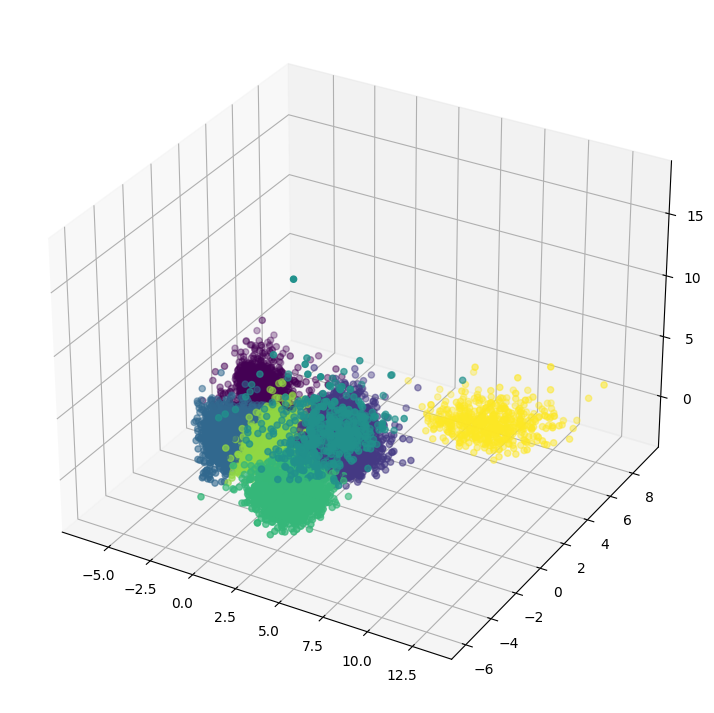

In [17]:
# Plot the projection according to the k-means clusters
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(projection[:,0], projection[:,1], projection[:,2], c=kmeans_labels)
plt.show()

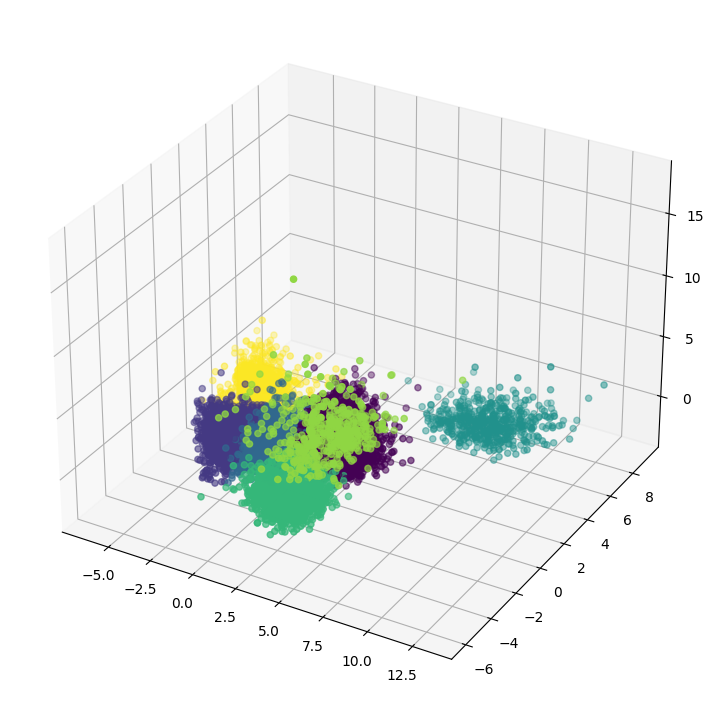

0.7137637558816043

In [18]:
# k is set to the ground truth number of clusters
kmeans = KMeans(n_clusters=7, random_state=0, n_init=20).fit(X_scaled)
# Plot the projection according to the k-means clusters
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(projection[:,0], projection[:,1], projection[:,2], c=kmeans.labels_)
plt.show()
normalized_mutual_info_score(kmeans.labels_, y.flatten())

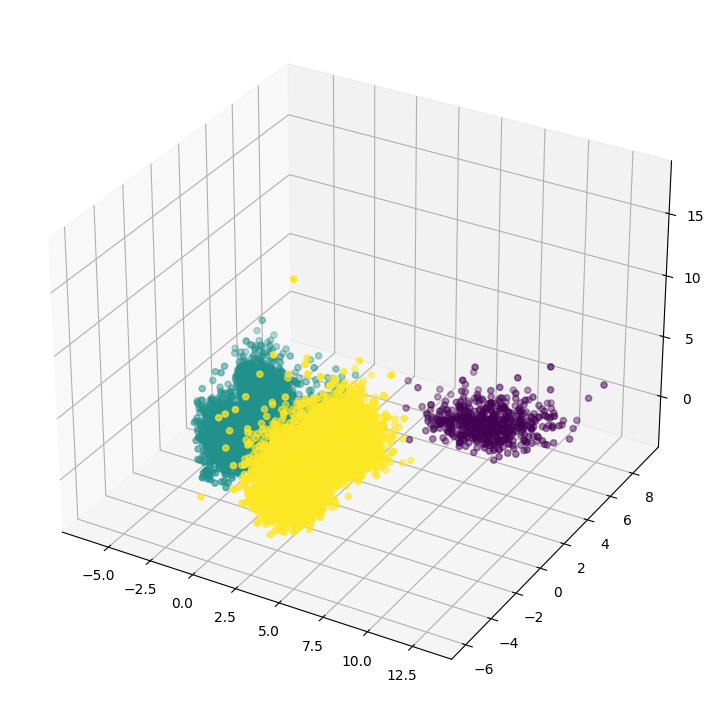

0.48621357110054236

In [19]:
# k is set to the ground truth number of clusters
kmeans = KMeans(n_clusters=3, random_state=0, n_init=20).fit(X_scaled)
# Plot the projection according to the k-means clusters
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(projection[:,0], projection[:,1], projection[:,2], c=kmeans.labels_)
plt.show()
normalized_mutual_info_score(kmeans.labels_, y.flatten())

In [ ]:
normalized_mutual_info_score(kmeans.labels_, y.flatten())

This line calculates the similarity between the clusters generated by the K-Means algorithm (kmeans.labels_) and the ground truth labels (y) using the normalized mutual information score. This score measures how well the K-Means clusters agree with the actual labels, with higher values indicating that K-Means clusters better represent the true data structure.

### Cluster Validation



Cluster validation is a process of assessing and measuring the quality and effectiveness of clustering algorithms in partitioning data into groups or clusters. It helps to determine how well the clustering algorithm has performed and whether the clusters are meaningful and accurate.

1. **(Normalized) Mutual Information**:
   -  is a metric that quantifies the level of agreement between the labels assigned by the k-means clustering algorithm and the true (known) labels of the data. It measures how well the clustering results align with the ground truth labels.
   - A higher value of mutual information indicates a strong agreement between the clustering and the true labels, suggesting that the clusters are representative of the actual patterns in the data.

2. **Scree Plot**:
   - The Scree Plot is a graphical method for determining the optimal number of clusters in a dataset. It involves running the k-means clustering algorithm with different numbers of clusters (values of k) and recording the loss or cost associated with each k.
   - The Scree Plot then plots the loss as a function of the number of clusters (k). By examining the shape of the plot, you can identify an "elbow" point, which is a point where the loss starts to level off.

In [20]:
# Compute the normalized mutual information between the predicted and the ground truth classification
normalized_mutual_info_score(kmeans_labels, y.flatten())

0.7137637558816043

### Build the scree plot

In order to locate approximately the elbow, we fit the first, let's say 4 points with a line and the last 4 points with a line, then the elbow will be approximately at the intersection.

In [ ]:
# scree plot
nk_base = np.arange(2, 21)  # Possible values for k in k-means
loss = np.zeros(nk_base.shape[0])  # Initialize an array to store loss values for different k
i = 0

# Iterate through different values of k
for nk in nk_base:
    ll, l_kmeans = k_means(nk, X_scaled, init='++', n_init=20)  # Run k-means with the current k
    loss[i] = l_kmeans  # Store the loss value for the current k
    i = i + 1

# Create a scatter plot to visualize the loss values
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(nk_base, np.log(loss), c='b')  # Scatter plot with x-axis as k values and y-axis as log(loss)
ax.set_xticks(nk_base)  # Set the x-axis ticks to correspond to the possible k values
ax.set_title('Scree Plot')  # Set the title of the plot
plt.show()  # Display the Scree Plot

In [23]:
# linear fit of first 4 points
reg = LinearRegression().fit(nk_base[:4].reshape(-1, 1), np.log(loss[:4]))
aa = reg.predict(nk_base[:8].reshape(-1, 1))
# linear fit of last 4 points
reg2 = LinearRegression().fit(nk_base[16:20].reshape(-1, 1), np.log(loss[16:20]))
bb = reg2.predict(nk_base.reshape(-1, 1))

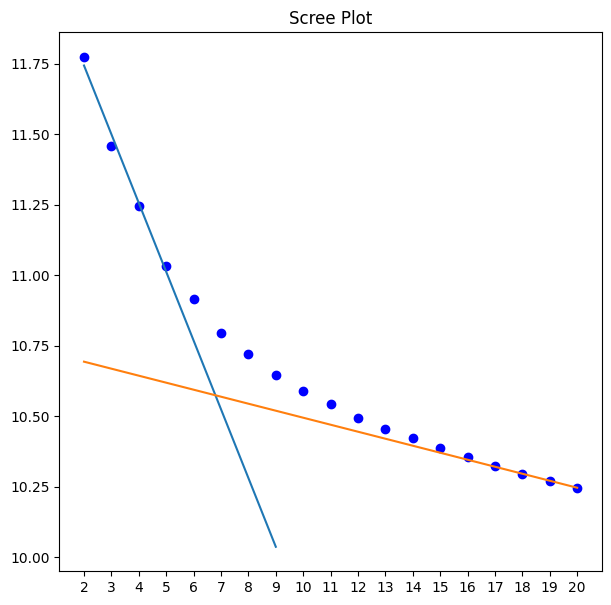

In [24]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(nk_base, np.log(loss), c='b')
ax.set_xticks(nk_base)
ax.set_title('Scree Plot')
ax.plot(nk_base[:8], aa[:8])
ax.plot(nk_base, bb)
plt.show()

Which is the optimal number of clusters according with the scree plot?

What happens if you don't initialize many times the algorithm?

## Play with other algorithms dimensionality reduction/clustering algorithms.

Try to obtain more information using other algorithms that we have seen during the lectures. Among the suggested algorithms, you can use ISOMAP or t-SNE for dimensional reduction, ward's hierarchical clustering, GMM or DBSCAN for clustering. You don't need to implement these algorithms, use any of the libraries in which them are already implemented (sklearn/scipy).

Since it's relatively easy, you can try to implement Density Peaks clustering.

### t-SNE (t-distributed stpchastoc neighbor embedding)

**Goal**: estimate, from the distances in the high- dimensional space, the probability of each point to be a neighbor of each other point. Then, the algorithm goal is to obtain a set of projected coordinates in which these “neighborhood probabilities” are as similar as possible to the ones in the original space.

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=15).fit_transform(X_scaled)
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_embedded[:,0], X_embedded[:,1], c=y)
ax.set_title('t-SNE')
plt.show()

### DBSCAN (density-based spatial clustering of application with noise)

**Goal**: clusters are connected regions with density above a threshold surrounded by regions with a density below this threshold. The density threshold is defined by two parameters: a neighborhood distance (*eps*) and the minimum number of configurations within this distance needed for considering a given configuration above the density threshold (*min_samples*)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.7, min_samples=12).fit(X_scaled)

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(projection[:,0], projection[:,1], projection[:,2], c=dbscan.labels_)
plt.show()

### Agglomerative Clustering (hierarchical clustering)

**Goal**: each configuration is initially assigned to a different cluster. At every iteration two existing clusters (i.e. the two closest according to the chosen criterion) are combined, so the next level of the dendrogram has one fewer cluster.



In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    # model.children_[i][0] and model.children_[i][1] are merged at level i
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    # linkage should contain [children_0, children_1, distance, n_points]
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_scaled)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

**Ward** linkage criterionminimizes the variance of the clusters being merged.

In [ ]:
ward = AgglomerativeClustering(n_clusters=7).fit(X_scaled) # ward is default linkage criterion
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(projection[:,0],projection[:,1], projection[:,2],c=ward.labels_)
plt.show()

In [ ]:
print ("kmeans", normalized_mutual_info_score(kmeans_labels, y.flatten()))
print ("dbscan", normalized_mutual_info_score(dbscan.labels_, y.flatten()))
print ("ward's", normalized_mutual_info_score(ward.labels_, y.flatten()))